In [2]:
from deepface import DeepFace 
import cv2
from matplotlib import pyplot as plt
import random as rd
import os

import firebase_admin
from firebase_admin import credentials
from firebase_admin import storage

from google.cloud import storage as strg
from google.oauth2 import service_account
import datetime

In [3]:
img_path1 = 'images/19030068.png'
img_path2 = 'images/i.png'

img_path1 = 'images/190311.jpg"
img_path2 = 'images/f658c22.jpg'

print(img)


In [4]:
model_name = 'VGG-Face'

In [5]:
credents = service_account.Credentials.from_service_account_file("serviceAccountKey.json")
cred = credentials.Certificate("serviceAccountKey.json")

app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'face-atendance.appspot.com',
}, name='storage')


In [7]:

client = strg.Client(project='face-atendance')

bucket = client.get_bucket('face-atendance.appspot.com')

blobs = bucket.list_blobs()

print(blobs)

DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

In [14]:

blob = bucket.("images/19B030068.png")
print(blob.generate_signed_url(datetime.timedelta(seconds=300), method='GET'))

https://storage.googleapis.com/face-atendance.appspot.com/images/19B030068.png?Expires=1682596764&GoogleAccessId=firebase-adminsdk-l2i7l%40face-atendance.iam.gserviceaccount.com&Signature=mmg5Jgro0KlJzHzJxOT4r%2FSNhe49vZw9NV5Dv2rNculsXlkrubQkof58pg%2BXlrMF2E3Wm2lv9E%2FZzcQKjsspm5DE20N4HY6lKt51EB%2B4jJUnZfbbwsRfkcDIDfybgHfB%2FMTcQYJRgcA4z%2BZjJjmNJKqVFu%2B6ox5aXm8x3vxQ%2FqwiRBFhUK5Mlysa5VTuDHCbWz4ulm4HQnHdWyWz%2FHVLu6xPD53taYCWdQZmwNBpP24qhCUsKibXnN6IrQY1KG1QW91MDSQvvOoDX74uVKhCQ%2FttHOSrtda6wf6tzOymrVVFhYD9WfNSGj0EEVN2Q1irS6cFfb88kQFg89yFNSjReA%3D%3D


In [18]:
img1 = DeepFace.extract_faces(img_path1)
# img2 = DeepFace.detectFace(img_path2)


ValueError: Confirm that images/19030068.png exists

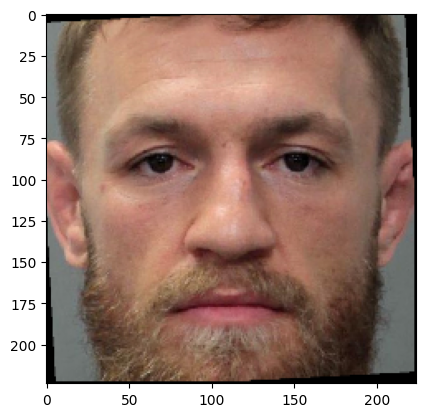

In [6]:
plt.imshow(img1)

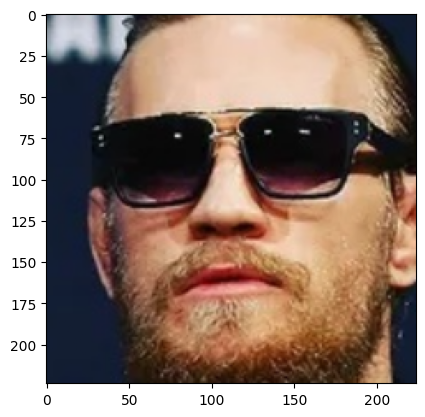

In [7]:
plt.imshow(img2)


In [8]:
res = DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name=model_name)

In [9]:
res

{'verified': True,
 'distance': 0.2658261591744139,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 104, 'y': 212, 'w': 695, 'h': 695},
  'img2': {'x': 20, 'y': 29, 'w': 161, 'h': 161}},
 'time': 34.86}

In [12]:
dfs = DeepFace.find(img_path=img_path1, db_path='images/', model_name=model_name, enforce_detection=False)

Finding representations: 100%|██████████| 32/32 [00:14<00:00,  2.27it/s]


Representations stored in images//representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  14.891401529312134  seconds


In [13]:
for filename in os.listdir('images/dataset'):
    img_path = os.path.join('images/dataset', filename)
    detected_faces = DeepFace.extract_faces(img_path, enforce_detection=False)
    for face in detected_faces:
        res = DeepFace.verify(img_path1, face['face'], enforce_detection=False)
        if res['verified']:
            print(f"Found {'Assan'} in {img_path}")

Found Assan in images/dataset\pic10658.jpg
Found Assan in images/dataset\pic10666.jpg
Found Assan in images/dataset\pic10668.jpg
Found Assan in images/dataset\pic10674.jpg
Found Assan in images/dataset\pic10698.jpg
Found Assan in images/dataset\pic10715.jpg
Found Assan in images/dataset\pic10720.jpg
Found Assan in images/dataset\pic10722.jpg
Found Assan in images/dataset\pic10790.jpg
Found Assan in images/dataset\pic10835.jpg
Found Assan in images/dataset\pic10839.jpg
Found Assan in images/dataset\pic10842.jpg
Found Assan in images/dataset\pic10877.jpg
Found Assan in images/dataset\pic10892.jpg
Found Assan in images/dataset\pic10938.jpg
Found Assan in images/dataset\pic10944.jpg
Found Assan in images/dataset\pic10949.jpg


In [13]:
print(dfs)

[                      identity  source_x  source_y  source_w  source_h  \
0           images//190311.png       104       212       695       695   
1           images//july21.png       104       212       695       695   
2           images//conor1.jpg       104       212       695       695   
3                images//i.png       104       212       695       695   
4      images//conorwblack.png       104       212       695       695   
5              images//123.jpg       104       212       695       695   
6       images//1246774488.png       104       212       695       695   
7       images//sunglasses.png       104       212       695       695   
8  images/dataset/pic10790.jpg       104       212       695       695   
9  images/dataset/pic10782.jpg       104       212       695       695   

   VGG-Face_cosine  
0     7.771561e-16  
1     1.253837e-01  
2     1.810281e-01  
3     2.658262e-01  
4     2.869099e-01  
5     2.875144e-01  
6     3.139842e-01  
7     3.257016e-